In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv003.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [ ]:
%autoreload
#bioqic = mre_pinn.data.BIOQICPhantom('../data/BIOQIC/downloads')
#bioqic.download()
bioqic.load_mat()
bioqic.preprocess()
dataset = bioqic.to_dataset()
dataset.save_xarrays('../data/BIOQIC/phantom')

In [3]:
%autoreload
frequency = 80
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', frequency, anat=True)
example.metadata

Loading ../data/BIOQIC/phantom/80/wave.nc
Loading ../data/BIOQIC/phantom/80/mre.nc
Loading ../data/BIOQIC/phantom/80/mre_mask.nc
Loading ../data/BIOQIC/phantom/80/anat.nc


  return key in self.data



Loading ../data/BIOQIC/phantom/80/anat_mask.nc


size  spacing  origin   limit   center  extent
variable dimension                                                
wave     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre      x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre_mask x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
anat     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375

In [4]:
example.describe()

dtype     count                     mean  \
variable component                                                  
wave     z          complex128  256000.0  -0.00008700+0.00007000j   
         x          complex128  256000.0   0.00006600+0.00000300j   
         y          complex128  256000.0   0.00014300-0.00055500j   
mre      scalar     complex128  256000.0  5833.823312+218.366417j   
mre_mask scalar          int64  256000.0   0.63810500+0.00000000j   
anat     z             float64  256000.0   317.1963002+0.0000000j   
         x             float64  256000.0   317.5180708+0.0000000j   
         y             float64  256000.0   316.9898007+0.0000000j   

                            std                 min                 25%  \
variable component                                                        
wave     z             0.003677 -0.014230-0.005919j -0.001781+0.001272j   
         x             0.004614 -0.011428+0.002524j -0.001673+0.001793j   
         y             0.013011 -0.026548+0.003513j -0.003184+0.001840j   
mre      scalar     5568.088756  0.000000+0.000000j  0.000000+0.000000j   
mre_mask scalar        0.727037  0.000000+0.000000j  0.000000+0.000000j   
anat     z           231.599891  0.000000+0.000000j   57.12500+0.00000j   
         x           232.539772  0.000000+0.000000j   57.12500+0.00000j   
         y           231.862697  0.000000+0.000000j   57.00000+0.00000j   

                                         50%                       75%  \
variable component                                                       
wave     z         -0.000189000-0.001859000j  0.001495000-0.000458000j   
         x          0.000053000+0.003829000j  0.001793000-0.006779000j   
         y          0.000298000+0.000855000j  0.003668000+0.000938000j   
mre      scalar     10097.662129+358.617637j  10097.662129+358.617637j   
mre_mask scalar     1.000000000+0.000000000j  1.000000000+0.000000000j   
anat     z          460.37000005+0.00000000j  525.87000005+0.00000000j   
         x          461.12000005+0.00000000j  526.70000005+0.00000000j   
         y          459.00000005+0.00000000j  527.00000000+0.00000000j   

                                          max  
variable component                             
wave     z           0.011644000+0.000187000j  
         x           0.011845000-0.002012000j  
         y           0.025939000-0.003657000j  
mre      scalar     35183.797846+2546.696361j  
mre_mask scalar      5.000000000+0.000000000j  
anat     z          2332.20000005+0.00000000j  
         x          2428.00000005+0.00000000j  
         y          2386.20000005+0.00000000j

Evaluating direct baseline
Evaluating FEM baseline
100%|██████████| 25/25 [01:11<00:00,  2.85s/it]


<IPython.core.display.Javascript object>


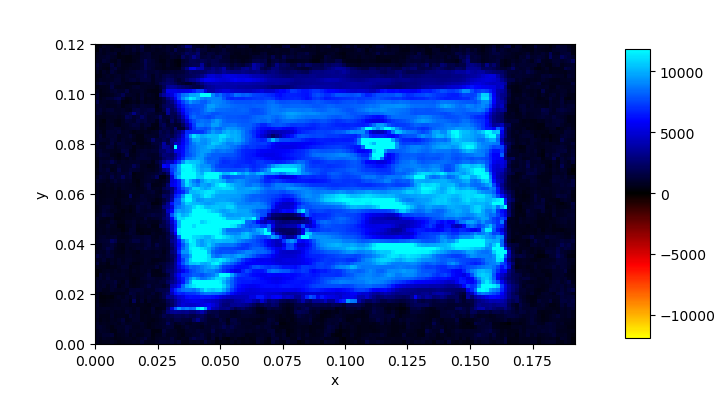

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


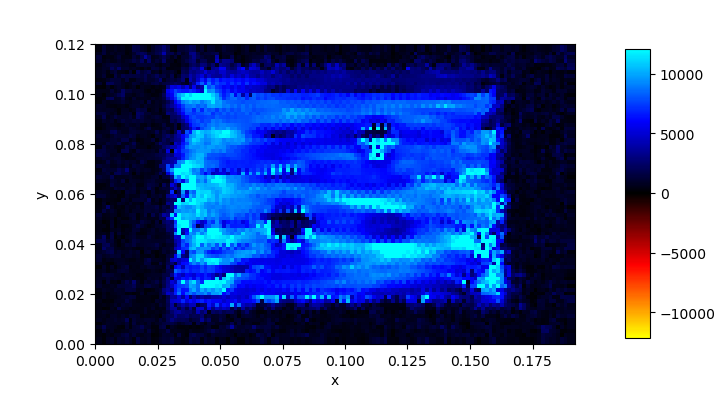

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [5]:
%autoreload
mre_pinn.baseline.eval_direct_baseline(example, frequency)
mre_pinn.baseline.eval_fem_baseline(example, frequency, mesh_scale=2, hetero=True)
example.view('direct', 'fem', polar=True, ax_height=3)

<IPython.core.display.Javascript object>


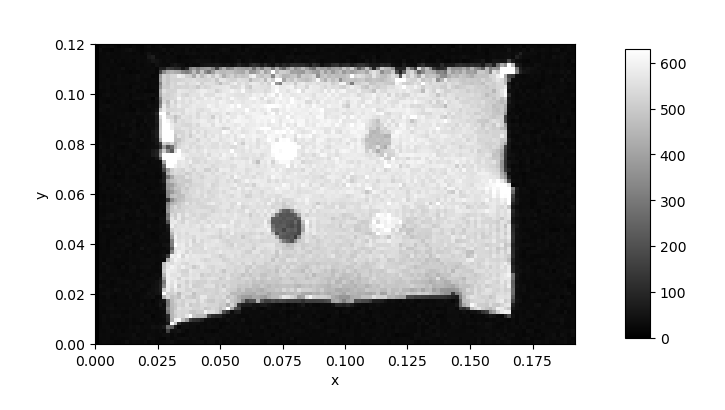

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


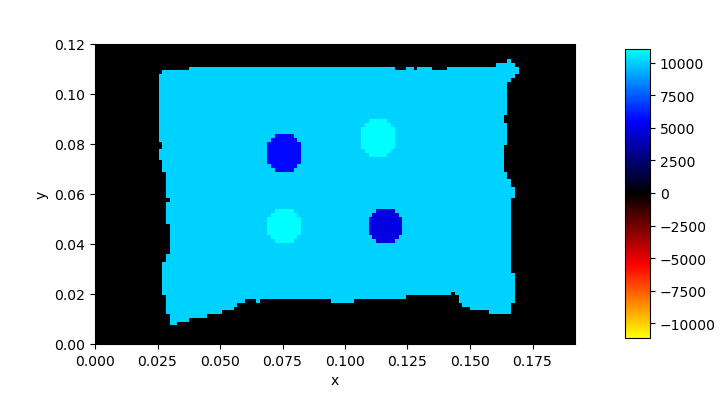

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [6]:
%autoreload
example.view('anat', 'mre', ax_height=3, mask=0.5)

In [13]:
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=example.wave.frequency.item(), detach=True)

In [14]:
%autoreload
pinn = mre_pinn.model.MREPINN(
    example,
    omega=60,
    n_layers=5,
    n_hidden=128,
    activ_fn='st',
    polar_input=False
)
pinn

MREPINN(
  (u_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=6, bias=True)
  )
  (mu_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=8, bias=True)
  )
)

In [10]:
%autoreload
model = mre_pinn.training.MREPINNModel(
    example, pinn, pde,
    loss_weights=[1, 0, 100, 1e-10],
    pde_warmup_iters=5000,
    pde_step_iters=5000,
    pde_init_weight=1e-12,
    n_points=1024
)
model.compile(optimizer='adam', lr=1e-4, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.032692 s



In [15]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0179s (12.10%)
Model time/iter: 0.0253s (17.09%)
Loss time/iter:  0.1049s (70.81%)
Total time/iter: 0.1481s
Total time: 14.8121s
1k iters time: 2.47m
10k iters time: 24.69m
100k iters time: 4.11h


<IPython.core.display.Javascript object>


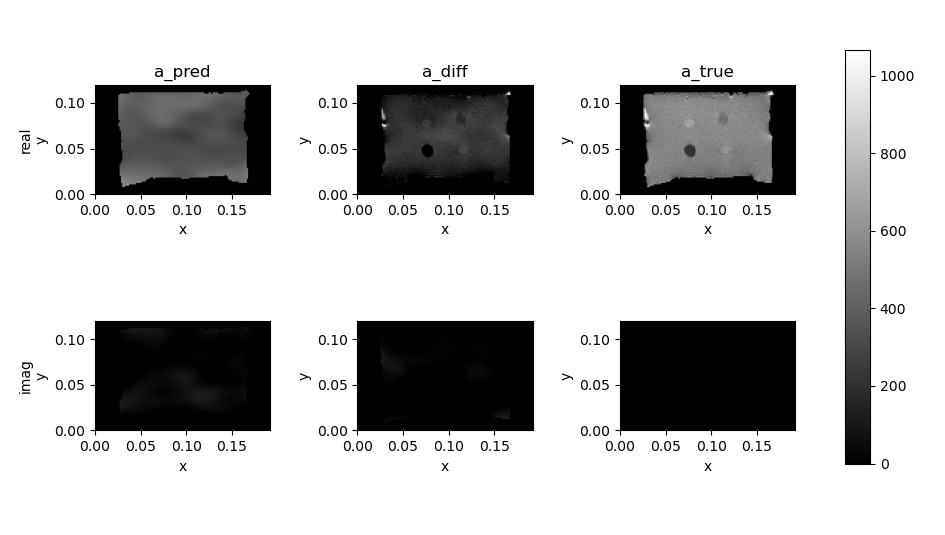

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


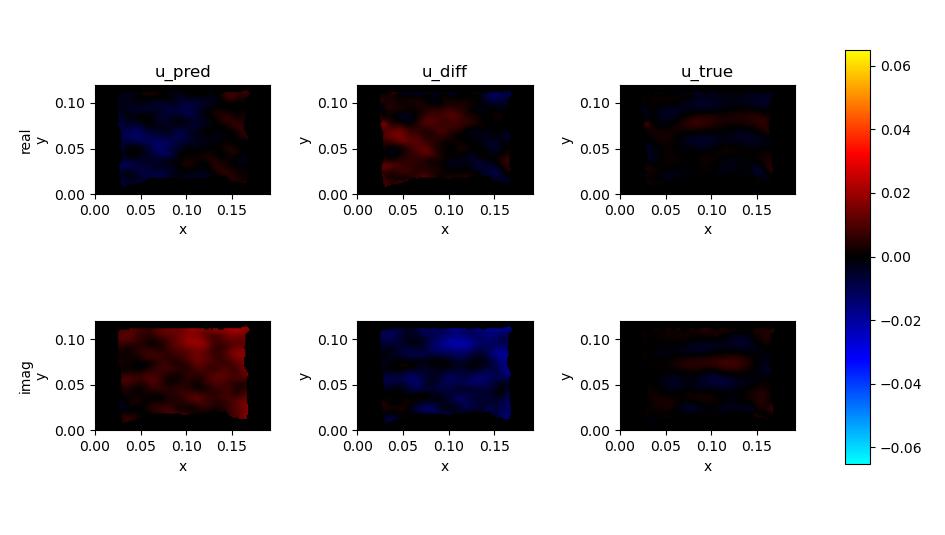

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


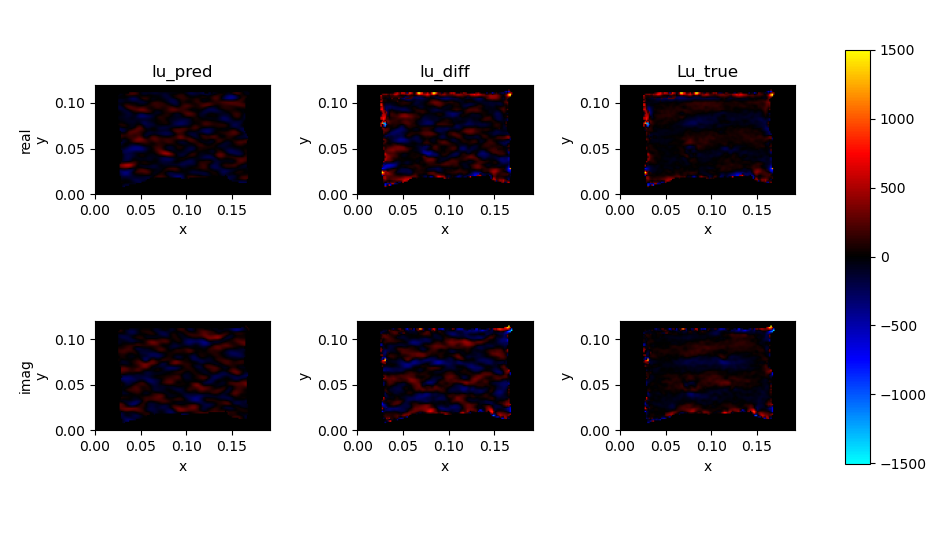

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


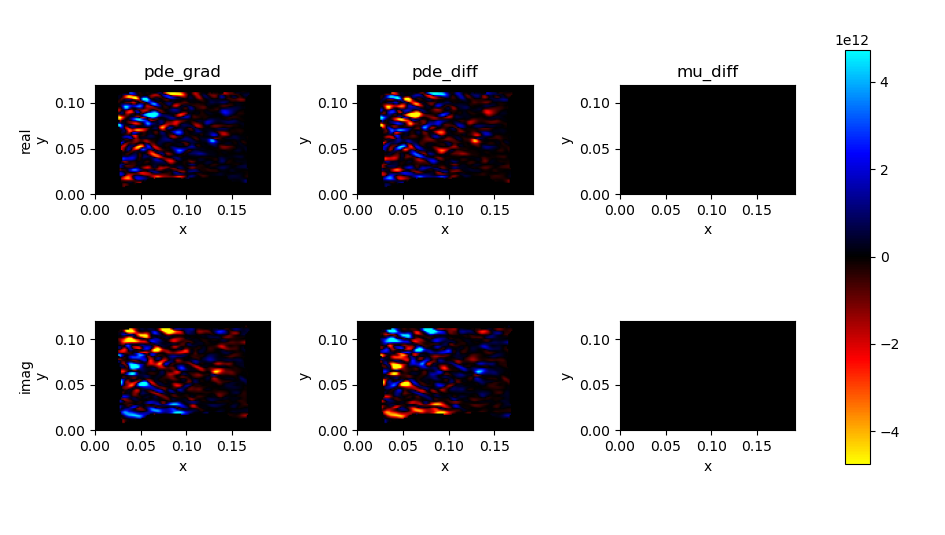

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


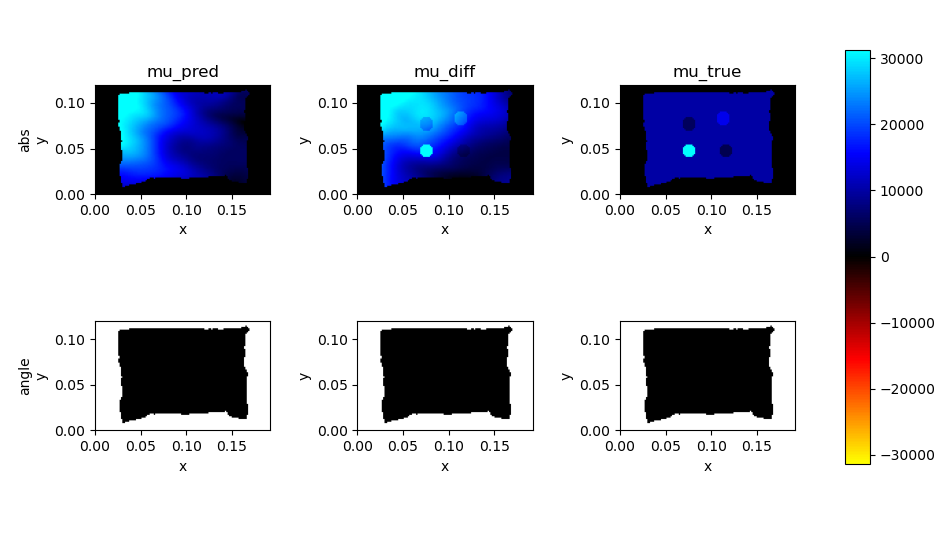

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


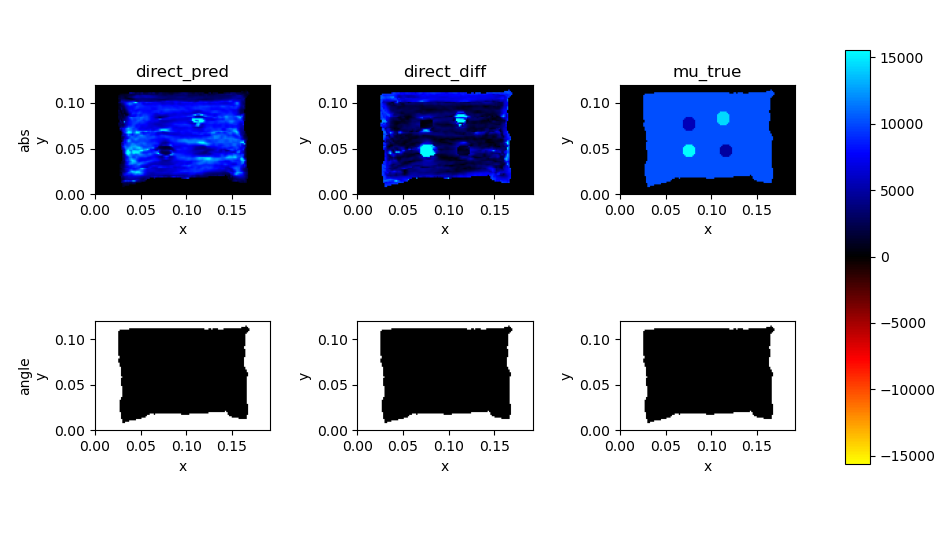

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


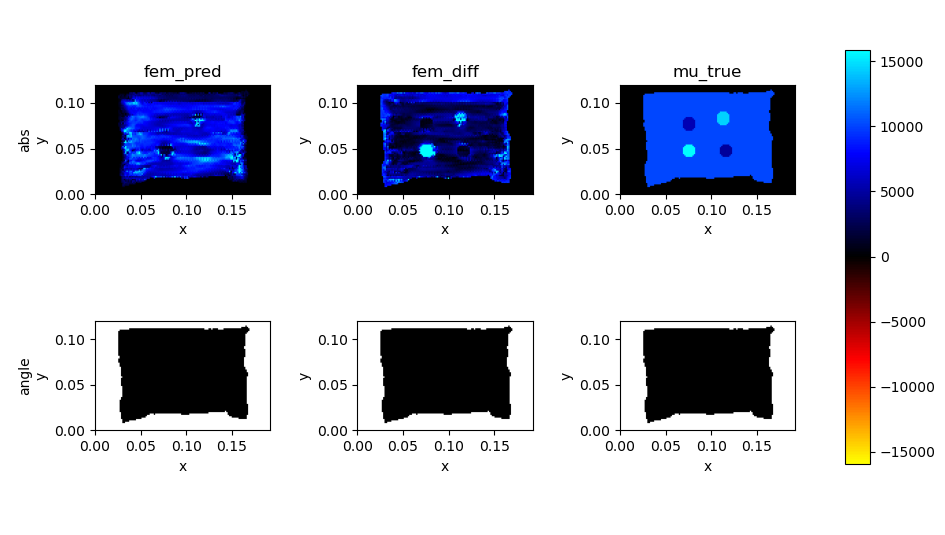

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

In [22]:
%autoreload
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)
test_eval.model = model
test_eval.test()

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [6.04e-04, 0.00e+00, 2.09e+07, 0.00e+00]    [6.03e-04, 0.00e+00, 2.07e+07, 0.00e+00]    []  


<IPython.core.display.Javascript object>


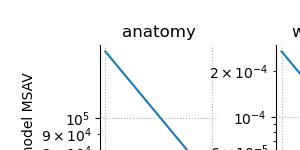

<IPython.core.display.Javascript object>


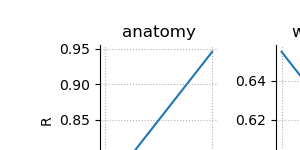

<IPython.core.display.Javascript object>


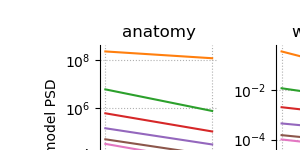

<IPython.core.display.Javascript object>


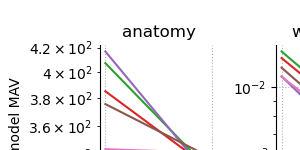

Time spent testing: 105.3341 (35.28%)
10        [4.79e-04, 0.00e+00, 1.06e+07, 0.00e+00]    [4.89e-04, 0.00e+00, 1.04e+07, 0.00e+00]    []  
20        [3.75e-04, 0.00e+00, 6.82e+06, 0.00e+00]    [3.98e-04, 0.00e+00, 6.52e+06, 0.00e+00]    []  
30        [3.21e-04, 0.00e+00, 6.09e+06, 0.00e+00]    [3.28e-04, 0.00e+00, 5.86e+06, 0.00e+00]    []  
40        [2.64e-04, 0.00e+00, 5.56e+06, 0.00e+00]    [2.74e-04, 0.00e+00, 5.49e+06, 0.00e+00]    []  
50        [2.30e-04, 0.00e+00, 5.03e+06, 0.00e+00]    [2.33e-04, 0.00e+00, 5.11e+06, 0.00e+00]    []  
60        [1.95e-04, 0.00e+00, 4.75e+06, 0.00e+00]    [2.02e-04, 0.00e+00, 4.88e+06, 0.00e+00]    []  
70        [1.80e-04, 0.00e+00, 4.71e+06, 0.00e+00]    [1.78e-04, 0.00e+00, 4.69e+06, 0.00e+00]    []  
80        [1.64e-04, 0.00e+00, 4.85e+06, 0.00e+00]    [1.59e-04, 0.00e+00, 4.51e+06, 0.00e+00]    []  
90        [1.39e-04, 0.00e+00, 4.32e+06, 0.00e+00]    [1.43e-04, 0.00e+00, 4.35e+06, 0.00e+00]    []  
100       [1.29e-04, 0.00e+00, 3.95

In [ ]:
model.train(100000, display_every=10, callbacks=[test_eval])